# Preamble

In [4]:
!pip install qiskit

     |████████████████████████████████| 8.5MB 1.3MB/s 
     |████████████████████████████████| 17.6MB 233kB/s 
     |████████████████████████████████| 204kB 35.6MB/s 
     |████████████████████████████████| 204kB 42.3MB/s 
     |████████████████████████████████| 2.1MB 27.1MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 1.3MB 34.5MB/s 
     |████████████████████████████████| 194kB 33.2MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 583kB 32.7MB/s 
     |████████████████████████████████| 3.2MB 39.3MB/s 
     |████████████████████████████████| 5.5MB 40.7MB/s 
  Created wheel for qiskit: filename=qiskit-0.23.6-cp37-none-any.whl size=2882 sha256=01ec9134d3048d59bf508f111f0185e363aa0081ca4679947bd5632a222b369f
  Stored in directory: /root/.cache/pip/wheels/b1/5e/2a/a9afb84cb4e8a08ea994982aaf040b2c668ef5fee81430f1f5
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2

In [5]:
!pip install quantumrandom

  Created wheel for quantumrandom: filename=quantumrandom-1.9.0-cp37-none-any.whl size=9132 sha256=033b2e1fd76b83f22ff0559661b93135a701c803e53e6c7abf810a33efa41c06
  Stored in directory: /root/.cache/pip/wheels/8b/de/bc/12078c164eb001e81d04661804325d0e153fa2881953fd8610
Successfully built quantumrandom


In [7]:
#check package versions 
import qiskit
print(qiskit.__version__)

0.16.4


In [10]:
import quantumrandom
print(quantumrandom.VERSION)

1.9.0


I will re-import these libraries in the examples to follow. The previous code is just to ensure the packages have been installed properly. 

Running the notebook sequentially should allow all cells to run without error. 

# Randomness is really hard for humans 

Humans are built to see patterns of all kinds in almost everything we do. Even when the patterns do not actually exist, our brains are incredible at creating them. We trade our ability to handle true randomness for this ability.

As such, the randomness we're probably familiar with in computing *seems random enough* for our daily lives. But, computers are deterministic. So, the algorithms used to generate the randomness is deterministic too.

In this notebook, I'll explore different ways to generate random numbers. In the future, the methods explored here will help build tools for generating noise in hardware simulations.

## Pseudo random numbers

The kind of randomness we are used to in computing comes from a pseudo random number generators (PRNG). A PRNG is an algorithm that uses an **initial value** to generate a seemingly random value. Usually, the initial value is related to your computer's internal clock. The algorithm is designed so that the properties of the numbers it generates approximate the properties of a truly random sequence.

Below, I'll implement a PRNG using `numpy`. Under the hood, `numpy` is creating a `Generator` object. Then, we are using this object interface to draw samples from a desired statistical distribution (the standard normal distribution in this case). 

In [1]:
#imports used throughout the notebook
from numpy.random import default_rng
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#the `Generator`
rng = default_rng()

#the number of samples to draw 
n = 100

#draw `n` values from the standard normal distribution
values = rng.standard_normal(n)

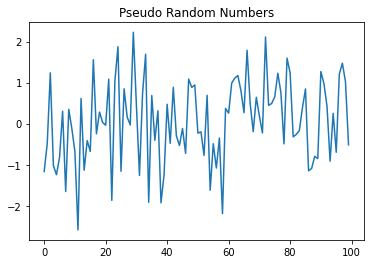

In [3]:
#plot the values
plt.plot(np.arange(0, n), values)
plt.title("Pseudo Random Numbers")
plt.show()

# Nature understands randomness very well

Unlike humans, the world we live in can use true randomness very well! One of the best examples comes from the world of quantum mechanics. 

With recent advancements in the sub-field of quantum computing, we can leverage the true randomness found in quantum mechanics. 

Researchers at the Australian National University offer truly random numbers completely for free. The numbers are generated by taking real quantum mechanical measurements in their laboratory. The results are then made available over the internet. Read more [about the project here](https://qrng.anu.edu.au/)

Luckily, there is a Python package that can be used right here in this notebook.

In [11]:
import quantumrandom as qr

#the number of samples to generate
n = 100

random_values = [qr.randint(0, 20) for i in range(0, n)]

#check that `n` random values have been generated
len(random_values)==n

True

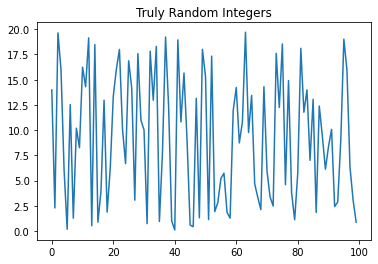

In [13]:
#plot the random sequence
domain = np.arange(0, n)
plt.plot(domain, random_values)
plt.title("Truly Random Integers")
plt.show()

The `quantumrandom` package does all the hard work for us. But to actually see how quantum mechanics can be used to generate truly random numbers, I'll create another random number generator below using IBM's Quantum Experience + Qiskit - a Python package for working with their quantum hardware.


The quantum number generator code would go here. It requires using my IBMQ API 
token to access the public facing quantum hardware. As such, I decided to forego
building it, for now.

The design is as follows:

- Set up a register of N qubits
- Do |q||H> on each qubit to put the qubits into an equal superposition 1/2(|1>+|2>)
- Measure the resulting qubits:  the output for each will collapse to either 0 or 1 with probability 1/2
- Place the measurement result into a classical register of N bits
- Read the register as a big endian, binary number
